In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [3]:
class datoni:
    
    def __init__(self, name):
        
        self.file_name = f"{name}"
        #self.file_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile{file_name}.csv"
        self.file_path = f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\datafile{name}.csv"
        self.datuni = pd.read_csv(self.file_path)
        self.lambdas = self.datuni.iloc[0]
        self.sim_data = self.datuni.iloc[1:]
        self.thresh = self.datuni.iloc[0,6]
        
        
    def media(self):
        #qua devo fare la media
        media = self.sim_data.mean() / 100000
        return media
        
    def varia(self):
        N = 100000
        r_mean = self.media()
        df_sq = (self.sim_data / N) ** 2
        r_mean2 = df_sq.mean()
        r_var_t = np.sqrt(np.abs(r_mean2 - (r_mean ** 2))) / r_mean
        r_var = r_var_t / np.max(r_var_t)
        return r_var

class plottoni:
    
    def __init__(self, pname, color, marker):
        self.pname = f"{pname}"
        self.color = f"{color}"
        self.marker = f"{marker}"
        self.pfile_name = f"{pname}"
        self.pfile_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\param_{self.pfile_name}.csv"
        self.params = pd.read_csv(self.pfile_path)
        self.p = self.params["p"][0]
        #print(self.p)
        self.w = self.params["w"][0]
        #print(self.w)
        self.r_s = self.params["r_s"][0]
        self.r_i = self.params["r_i"][0]
        self.α_m = self.params["α_m"][0]
        self.datoni = datoni(name = self.pname)
        self.erre = [float(column) for column in self.datoni.datuni.columns]
    
    def plotto_m(self, axs):
        
        axs.plot(self.datoni.lambdas, self.datoni.media(), color=self.color, marker=self.marker , alpha=0.7, label=f"$r_s = {self.r_s}\, r_i = {self.r_i}$")
        axs.vlines(self.datoni.thresh, ymin = 0, ymax = 0.7,  colors = self.color, linestyle = "-.")
        
        lower_bound, upper_bound = np.percentile(self.datoni.sim_data/100000, [2.5, 97.5], axis = 0)
        axs.fill_between(x=self.datoni.lambdas, y1=lower_bound, y2=upper_bound, color=self.color, alpha =0.2, linewidth = 0)
        axs.scatter(self.datoni.lambdas, self.datoni.media(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)
        
        axs.set_xlabel("$\lambda$")
        axs.set_ylabel("$r_{\infty}$")
        axs.spines["top"].set_visible(False)
        axs.spines["right"].set_visible(False)
        axs.grid(axis="both", linestyle="--", linewidth=0.3)
        
        

    def plotto_v(self, axs): 
        axs.plot(self.datoni.lambdas, self.datoni.varia(), color=self.color, marker=self.marker , alpha=0.7, label=f"$r_s = {self.r_s}\, r_i = {self.r_i}$")
        axs.vlines(self.datoni.thresh, ymin = 0, ymax = 1,  colors = self.color, linestyle = "-.")
        axs.scatter(self.datoni.lambdas, self.datoni.varia(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)

        
        axs.set_xlabel("$\lambda$")
        axs.set_ylabel("$σ_{r_∞}/σ_{max}$")
        axs.spines["top"].set_visible(False)
        axs.spines["right"].set_visible(False)
        axs.grid(axis="both", linestyle="--", linewidth=0.3)

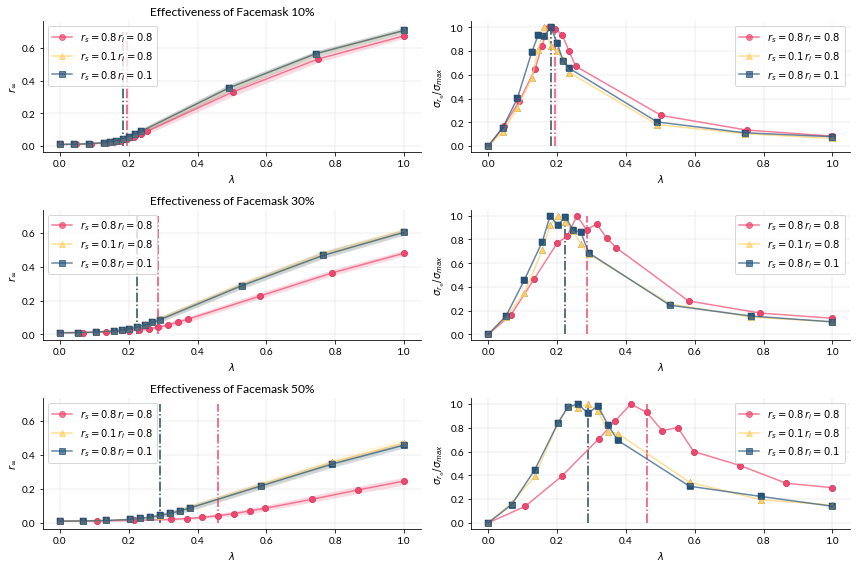

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

rows = 3
cols = 3

# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#ffd166", "#26547c"]
pallini = ["o", "^",  "s"]
# Create instances of datoni for each element in the matrix
for i in range(rows):
    for j in range(cols):
        # Create an instance of datoni and store it in the matrix
        mm = i+1
        pmatrix[i][j] = plottoni(pname = f"{mm}{j}mask1", color = colori[j], marker = pallini[j])
        pmatrix[i][j].plotto_m(axs[i][0])
        pmatrix[i][j].plotto_v(axs[i][1])
        
for ax in axs.flatten():
    ax.grid(True)
    ax.legend()

axs[0][0].set_title("Effectiveness of Facemask 10%")
axs[1][0].set_title("Effectiveness of Facemask 30%")
axs[2][0].set_title("Effectiveness of Facemask 50%")

plt.tight_layout()

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_mask_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show()